In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file (including solutions) to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00 AM ET, Friday, September 23, 2022**.

**BIG HINT:** Read the entire homework before starting.  

# Homework 1: Solving Systems of Linear Equations (100 points total)

These problems are intended to give students exposure to the style of some of the questions asked on quizzes and help you practice. Please finish the entire Jupyter Notebook and turn in your edited file using the [MSU D2L Website](http://d2l.msu.edu).

You may collaborate with other students in this course. However, you may only share ideas with each other, not code or answers. 

**Also, note that your section's TA will run your code cells in order (top to bottom) in order to grade your homework submission. So please make sure your code cells work as you intend when you run them in order.**

### Outline for Homework 1

1. [Basics](#Basics)
1. [Working at MSU](#Working-at-MSU)
1. [Balancing Chemical Equations](#Balancing-Chemical-Equations)
1. [Traffic Control](#Traffic)
1. [Convergence of Jacobi Method](#CJM)

For convenience, you can run the following cell to perform all the imports you'll need for this homework. You can also import packages in other cells if you wish.

In [ ]:
%matplotlib inline 
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()
import os.path
from urllib.request import urlretrieve
if not os.path.isfile("answercheck.py"):
    urlretrieve('https://raw.githubusercontent.com/colbrydi/jupytercheck/master/answercheck.py', 'answercheck.py');
from answercheck import checkanswer


---
<a name=Basics></a>
# 1. Basics (27 points)

&#9989;  **<font color=red>QUESTION 1a:</font>** (18 points) Suppose $u, v \in\mathbb{R}^4$ and $x,y\in\mathbb R^3$ are vectors given by
* $u=[1,2,-1,2], v=[2,1,3,4]$ and  $x=[0,1,-1], y=[3,2, \pi]$.

For each of the following expressions, state whether or not the expression is well-defined in the setting of linear algebra, and briefly explain your reasoning. If an expression is well defined, also calculate its value. 

1. $u\cdot v$
1. $u\cdot x$
1. $u\cdot v + x\cdot y$
1. $u + x\cdot y$
1. $(u+v)\cdot v$
1. $(u \cdot v)x$

Recall that for any two vectors $a,b \in \mathbb R^n$ (of the same size) given by $a=[a_1, \dots, a_n]$ and $b=[b_1, \dots, b_n]$, their dot product (a scalar) is defined as $a \cdot b = a_1b_1 + a_2b_2 + \cdots + a_nb_n$.

Enter your answers in this markdown cell by double clicking here:

1. Well-Defined. The dot product of of two vectors is well defined. 𝑢⋅𝑣 = 2 + 2 - 3 + 8 = 9
2. Not Well-Defined. The dot product of two vectors of different size is not well-defined. 
3. Well-Defined. Each dot product is defined. The sum of two scalars is a scalar. 𝑢⋅𝑣+𝑥⋅𝑦 = 8 + (5-𝜋) = 13 - 𝜋
4. Not Well-Defined. A scalar quantity (dot product 𝑥⋅𝑦) cannot be added to a vector quantity because they have different dimensions.
5. Well-Defined. The sum of two vectors of the same size is defined. The dot product of two vectors of the same size is a defined scalar. (𝑢+𝑣)⋅𝑣 = 39
6. Well-Defined. The dot product of u and v was found previously and is defined. A scalar and vector can be multiplied and would be a defined vector. (𝑢⋅𝑣)𝑥 = [0,9,-9]

&#9989;  **<font color=red>QUESTION 1b:</font>** (3 points) Consider the following augmented matrix $[A|b]$, in Reduced Row Echelon Form (RREF), representing a system of linear equations, $Ax=b$. Find ALL possible solutions, $x$, of the system, and justify your answer.

$$[A|b] = \left[ \begin{matrix} 1 & 0 & 0 \\ 0 & 1 & 0  \\ 0 & 0 & 1  \end{matrix} \, \middle\vert \, \begin{matrix} 9 \\ -4 \\ 6 \end{matrix} \right]$$

x1 = 9, x2 = -4, x3 = 6. So x = [[9],[-4],[6]]. Since x1 + 0x2 + 0x3 = 9, 0x1 + 1x2 + 03x =-4, 0x1 + 0x2 + 1x3 = 6. You solve for each solution of x1,x2,x3 and find the values. 

&#9989;  **<font color=red>QUESTION 1c:</font>** (3 points) Consider the following augmented matrix $[B|c]$, in Reduced Row Echelon Form (RREF), representing a system of linear equations, $Bx=c$. Find ALL possible solutions, $x$, of the system, and justify your answer.

$$[B|c] = \left[ \begin{matrix} 1 & 0 & 2 \\ 0 & 1 & 3  \\ 0 & 0 & 0  \end{matrix} \, \middle\vert \, \begin{matrix} 9 \\ -4 \\ 6 \end{matrix} \right]$$

No solution. 0 does not equal 6 so the system of equations has no solution. 

&#9989;  **<font color=red>QUESTION 1d:</font>** (3 points) Consider the following augmented matrix $[C|d]$, in Reduced Row Echelon Form (RREF), representing a system of linear equations, $Cx=d$. Find ALL possible solutions, $x$, of the system, and justify your answer.

$$[C|d] = \left[ \begin{matrix} 1 & 0 & 2 \\ 0 & 1 & 3  \\ 0 & 0 & 0  \end{matrix} \, \middle\vert \, \begin{matrix} 9 \\ -4 \\ 0\end{matrix} \right]$$

x1=9-2x3, x2=-4-3x3

These are the solutions to the system of equations. x3 can equal any value since it's a free variable.  0 times anything = 0 so here you can plug any value in for x3 and it'll still give you a different x1 and x2 since they depend on x3; meaning our solution is still an expression of a system of equations.

---
<a name=Working-at-MSU></a>
# 2. Working at MSU (12 points)

Yoshi works at MSU as both a clerical assistant and a learning assistant. Yoshi gets paid $\$11.65$ an hour for working as a clerical assistant and $\$14.50$ an hour for working as a learning assistant. Last week, Yoshi worked a total of $29$ hours and earned a total of  $\$366.35$. (Ignore taxes for this problem.) If we let $c$ to be the number of hours Yoshi worked as a clerical assistant and $l$ to be the number of hours Yoshi worked as a learning assistant then we get two equations:

$$ c + l = 29$$

$$ 11.65c + 14.50l = 366.35$$

&#9989;  **<font color=red>QUESTION 2a:</font>** (6 points)  Represent the above system of equations as a matrix equation of the form $Ax = b$ and then use ``numpy`` to solve the system and display your answer. Store your answer in the variable `x` for answer check.

In [8]:
##Edit this cell to answer the question.
A = np.matrix([[1,1], [11.65, 14.50]])
b = np.matrix([[29], [366.35]])
x = np.linalg.solve(A,b)

In [9]:
from answercheck import checkanswer

checkanswer.vector(x,"50217f589f71d1f12cb18224bd6d5523");


    Trying to convert to a column vector using ```A = A.T```.

Testing [[19. 10.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2b:</font>** (6 points) Use complete sentences to describe what the three values $A_{2,2}$, $x_{1}$, and $b_{2}$ represent in the context of Yoshi's situation.

COMPLETE THE FOLLOWING SENTENCES..

The value $A_{2,2}$ represents how much Yoshi makes an hour for working as a learning assistant.

The value $x_{1}$ represents how many hours Yoshi works as a clerical assistant

The value $b_{2}$ represents how much Yoshi earned ($366.35) working a total of 29 hours last week.

----
<a name=Balancing-Chemical-Equations></a>
# 3. Balancing Chemical Equations (16 points)

<img src = "https://upload.wikimedia.org/wikipedia/commons/7/7c/Combustion_reaction_of_methane.jpg" width = 500>

Image from Wikipedia article on [Stoichiometry](https://en.wikipedia.org/wiki/Stoichiometry).

A chemical formula is a symbolic representation which shows how many atoms of each element make up a molecule. For example, water (denoted by $H_2O$) is a molecule with two $H$ (hydrogen) atoms and one $O$ (oxygen) atom. A chemical equation is the symbolic representation of a chemical reaction, wherein the reactant molecules are given on the left-hand side and the product molecules on the right-hand side. The coefficients of the symbols represent the number of molecules of each chemical required to preserve matter in the chemical reaction. 

For example, the process of burning methane is represented by the chemical equation

$$ 1 CH_4 + 2 O_2 \rightarrow 1CO_2 + 2 H_2O$$

The above equation shows that one molecule of $CH_4$ (methane) and two molecules of $O_2$ (oxygen) turn into one molecule of $CO_2$ (carbon dioxide) and two molecules of $H_2O$ (water). We see there are a total of one $C$ (carbon) atom, four $H$ (hydrogen) atoms, and four $O$ (oxygen) atoms on the left side, and the same on the right side. So matter is neither created nor destroyed by the reaction. 

Now, suppose that we know that burning methane requires $CH_4$ (methane) and $O_2$ (oxygen) molecules and produces $CO_2$ (carbon dioxide) and $H_2O$ (water) molecules, but we don't know how many of each molecule are required for the reaction to take place or how many of each molecule are will be produced by the reaction. 

We can assign coefficients that represent the number of each molecule involved in the reaction like this:  

$$x_1 CH_4 + x_2 O_2 \rightarrow x_3 CO_2 + x_4 H_2O$$

Here we see that each molecule in the reaction gives us an unknown variable. For each element, we can obtain an equation in these variables by using the fact that the total number of atoms of that element on the left side and right side must be equal:

$$ C: x_1  = x_3 $$
$$ H: 4x_1 = 2x_4$$
$$ O: 2x_2 = 2x_3 + x_4$$

We can convert represent this system of equations by the augmented matrix $$ \left[ \begin{matrix} 1 & 0 & -1 & 0 \\ 4 & 0 & 0 &-2 \\ 0 & 2 & -2 & -1  \end{matrix} \, \middle\vert \, \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right]
\stackrel{RREF}{\longrightarrow}
\left[ \begin{matrix} 1 & 0 & 0 & -0.5 \\ 0 & 1 & 0 &-1 \\ 0 & 0 & 1 & -0.5  \end{matrix} \, \middle\vert \, \begin{matrix} 0 \\ 0 \\ 0 \end{matrix} \right]$$

This leads us to equations $$x_1 - \frac 1 2 x_4 = 0$$

$$ x_2 -  x_4 = 0$$

$$ x_3 - \frac 1 2 x_4 = 0$$

To get integer values for our solution we can take $x_4 =2$ and see that $x_1 = 1, x_2 = 2,$ and $x_3 = 1$, which is consistent with the chemical equation for burning methane.

---
For "simple" chemical reactions, balancing the formula by solving a system of linear equations might seem like overkill, as the coefficients are usually small and be obtained by guessing and checking. However, for more complicated chemical reactions, this method has value. 

The (unbalanced) chemical reaction $$KNO_3 + C_{12}H_{22}O_{11} \rightarrow N_2 + CO_2 + H_2O + K_2CO_3$$ represents combining $KNO_3$ (potassium nitrate) and $C_{12}H_{22}O_{11}$ (sucrose) to produce $N_2$ (nitrogen), $CO_2$ (carbon dioxide), $H_2O$ (water), and $K_2CO_3$ (potassium carbonate). To balance this reaction, we will once again assign coefficients for each molecule in the reaction

$$x_1KNO_3 + x_2C_{12}H_{22}O_{11} \rightarrow x_3N_2 + x_4CO_2 + x_5H_2O + x_6K_2CO_3.$$

Again, for each element, we will have one equation which arises from the fact that the number of atoms of that element on the left and right sides must be equal:

$$C: 12x_2 = x_4 + x_6$$
$$H: 22x_2 = 2x_5$$
$$K: x_1 = 2x_6$$
$$N: x_1 = 2x_3$$
$$O: 3x_1 + 11x_2 = 2x_4 + x_5 + 3x_6$$

&#9989;  **<font color=red>QUESTION 3a:</font>** (6 points) Represent the above system of linear equations as an augmented matrix $M$, and store the augmented matrix as a numpy matrix called ``M`` for answer check.

In [2]:
#Edit this cell to answer the question
M = np.matrix([[0,12,0,-1,0,-1,0], [0,22,0,0,-2,0,0], [1,0,0,0,0,-2,0],[1,0,-2,0,0,0,0],[3,11,0,-2,-1,-3,0]])

In [3]:
from answercheck import checkanswer

checkanswer.matrix(M,"62674079c98c89caa39e62be575359f2")


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 0. 12.  0. -1.  0. -1.  0.]
 [ 0. 22.  0.  0. -2.  0.  0.]
 [ 1.  0.  0.  0.  0. -2.  0.]
 [ 1.  0. -2.  0.  0.  0.  0.]
 [ 3. 11.  0. -2. -1. -3.  0.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3b:</font>** (4 points) Find the reduced row echelon form of the matrix $M$ above and display it. Save the reduced matrix as ``Mrref`` for answer check.

In [4]:
#Edit this cell to answer the question
Mrref,_ = sym.Matrix(M).rref()
Mrref

⎡1  0  0  0  0   -2    0⎤
⎢                       ⎥
⎢0  1  0  0  0  -5/24  0⎥
⎢                       ⎥
⎢0  0  1  0  0   -1    0⎥
⎢                       ⎥
⎢0  0  0  1  0  -3/2   0⎥
⎢                       ⎥
⎢               -55     ⎥
⎢0  0  0  0  1  ────   0⎥
⎣                24     ⎦

In [5]:
from answercheck import checkanswer

checkanswer.matrix(Mrref,"da1d7eb7e0e258460654b03f18d3d522");


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.       0.       0.       0.       0.      -2.       0.     ]
 [ 0.       1.       0.       0.       0.      -0.20833  0.     ]
 [ 0.       0.       1.       0.       0.      -1.       0.     ]
 [ 0.       0.       0.       1.       0.      -1.5      0.     ]
 [ 0.       0.       0.       0.       1.      -2.29167  0.     ]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 3c:</font>** (6 points) Find the solution to this system of equations for which $x_1,x_2,x_3,x_4,x_5,x_6$ are all positive integers and $x_6$ is as small as possible. Save your answer as ``solution`` which is the list $[x_1,x_2,x_3,x_4,x_5,x_6]$

In [2]:
x6 = 24
x1 = 2*x6
x2 = 5/24*x6
x3 = 1*x6
x4 = 3/2*x6
x5 = 55/24*x6
#print out all x's 1 through 6.
solution = [x1,x2,x3,x4,x5,x6]
print(solution)

[48, 5.0, 24, 36.0, 55.0, 24]


In [5]:
#Edit this cell to save your answer.
solution=[48, 5.0, 24, 36.0, 55.0, 24]

In [6]:
from answercheck import checkanswer

checkanswer.vector(np.matrix(solution),"7946d0c288fc32c4a6342e0cb54b793c");

Testing [[48.  5. 24. 36. 55. 24.]]
Answer seems to be correct



---
<a name=Traffic></a>
# 4. Traffic Control (20 points)

<img src="https://i.ibb.co/BPLKY6W/Traffic.png" alt="Image of traffic coming in and out of 4 intersections" />

#### The city of Lansing is trying to resolve traffic congestion at the intersections of Saginaw, Larch, Michigan, and Cedar, as shown in the figure above. The streets are one-way, as indicated by the arrows.

The city wishes to improve the signals at these corners so as to speed the trafic flow. The data the traffic engineers have gathered shows the following:
* 300 cars/hour enter intersection A on Saginaw.
* 500 cars/hour enter intersection A on Cedar.
* 200 cars/hour leave intersection B on Larch.
* 100 cars/hour leave intersection B on Saginaw.
* 300 cars/hour enter intersection C on Michigan.
* 200 cars/hour enter intersection C on Larch.
* 600 cars/hour leave intersection D on Cedar.
* 400 cars/hour leave intersection D on Michigan.

We can then use the variables:
* $x_1$ to denote the number of cars/hour leaving intersection A and entering intersection B on Saginaw
* $x_2$ to denote the number of cars/hour leaving intersection A and entering intersection D on Cedar
* $x_3$ to denote the number of cars/hour leaving intersection C and entering intersection D on Michigan
* $x_4$ to denote the number of cars/hour leaving intersection C and entering intersection B on Larch

The number of cars entering intersection A must equal the number leaving intersection A, so 
$$x_1+x_2 = 500+300$$
or equivalently
$$x_1+x_2 = 800$$

&#9989; **<font color=red>Question 4a:</font>** (3 points) Write the three equations represeting the traffic entering and leaving intersections B, C, and D.


x3 + x4 = 300 + 200 = 500

x1 + x4 = 200 + 100 = 300

x2 + x3 = 400 + 600 = 1000

&#9989; **<font color=red>Question 4b:</font>** (8 points) Use the four equations to set up an augmented matrix, and then solve the system by the Gauss-Jordan method, using $x_4$ as the parameter. Explain why, based on the RREF of the matrix, we have an infinite number of solutions and why we can use $x_4$  as the parameter.

#Put your answer to the above question here (you can double click this cell and edit the $\LaTeX$ code for these matrices). 

The augmented matrix is: 
$$\left[ \begin{array}{rrrr|r}
1 & 1 & 0 & 0 &800 \\
0 & 0 & 1 & 1 &500 \\
1 & 0 & 0 & 1 &300 \\
0 & 1 & 1 & 0 &1000 
\end{array}
\right]$$

The reduced row echelon form (RREF) of this matrix is:
$$\left[ \begin{array}{rrrr|r}
1 & 0 & 0 & 1 &300 \\
0 & 1 & 0 & -1 &500 \\
0 & 0 & 1 & 1 &500 \\
0 & 0 & 0 & 0 &0 
\end{array}
\right]$$

The solution to this system of equations (with $x_4$ as a parameter) is: 
$$x_1 = ?$$
$$x_2 = ?$$
$$x_3 = ?$$
$$x_4 = ?$$

In [14]:
slay = np.matrix([[1,1,0,0,800], [0,0,1,1,500], [1,0,0,1,300],[0,1,1,0,1000]])
slay_rref,_ = sym.Matrix(slay).rref()
slay_rref

⎡1  0  0  1   300⎤
⎢                ⎥
⎢0  1  0  -1  500⎥
⎢                ⎥
⎢0  0  1  1   500⎥
⎢                ⎥
⎣0  0  0  0    0 ⎦

&#9989; **<font color=red>Question 4c:</font>** (3 points) Based on your solution in 4b, what are the largest and smallest possible values for the number of cars/hour leaving intersection C and entering intersection B on Larch? Justify your answer.

The largest value possible for the number of cars leave would be 300 since it is the maximum value we can input as x4 before the outputs become negative values and the smallest possible value for the number of cars would be zero. x4 must be zero or a positive integer.

&#9989; **<font color=red>Question 4d:</font>** (6 points) Similar to above, what are the largest and smallest possible values for $x_1$, $x_2$, $x_3$? Again, justify your answers.

- The largest value possible for x1 would be 300 (this would occur when x4=0) and the smallest possible value for the number of cars would be zero (when x4=300)
- The largest value possible for x2 would be 800 and the smallest possible value for the number of cars would be 500.
- The largest value possible for x3 would be 500  and the smallest possible value for the number of cars would be 200. (when x4=300)

---
<a name=CJM></a>
# 5. Convergence of the Jacobi Method (25 points)

In this problem, we will investigate using the Jacobi method to solve systems of equations. Note that Questions 5b, 5c, and 5d are very similar, so once you figure out how to do one of them, the other two will be easy. Recall from class that the Jacobi Method will not work an all problems, and 

<a name=DD></a>**a sufficient (but not necessary) condition for the Jacobi method to converge is that the matrix $A$ corresponding to the left side of the system of equations is strictly diagonally dominant.**

&#9989; **<font color=red>Question 5a</font>** (4 points) Write in your own words what strictly diagonally dominant means.

A strictly diagonally dominant matrix is a non-singular matrix where the diagonal elements of the matrix have a sum that is greater or equal to the sum of the non-diagonal elements in the same row. 

If the diagonal element of every row is greater or equal to the sum of the non-diagonal elements of the same row, then the matrix is a diagonally dominant matrix.

&#9989; **<font color=red>Question 5b</font>** (7 points total) Consider the following system of equations, denoted by $\text{(I)}$. $$\begin{align}4x + y - z &= 15 \\ -2x - 5y + z &= -13 \\ x - y + 6z &= -10\end{align} \tag{I}$$

&#9989; **<font color=red>Question 5b(i) </font>** (1 point) Use numpy to solve $\text{(I)}$ and display the solution. 

In [14]:
#Put your code to the above question here
A_5 = np.matrix([[4,1,-1], [-2,-5,1],[1,-1,6]])
print(A_5)
b_5 = np.matrix([[15],[-13],[-10]])
x = np.linalg.solve(A_5,b_5)
print(x)

[[ 4  1 -1]
 [-2 -5  1]
 [ 1 -1  6]]
[[ 3.]
 [ 1.]
 [-2.]]


&#9989; **<font color=red>Question 5b(ii) </font>** (1 point) Based on the [condition we learned in class](#DD), is the Jacobi method guaranteed to converge if we use it to solve $\text{(I)}$?

The above system of equations is diagonally dominant therefore it is sufficient and meets the conditions for a Jacobi method to converge. I tested this by looking at the diagonal variable for each row: 4 > (1 + |-1|), |-5| > (|-2| + 1), 6 > (1+|-1|). Based on these conditions it is gaurtanteed to converge using the Jacobi method to solve. 

&#9989; **<font color=red>Question 5b(iii) </font>** (3 points) Regardless of your answer to Question 5.2.2, use $25$ iterations of the Jacobi method to solve $\text{(I)}$. Make a plot showing the iteration number on the horizontal axis and the values of $x$, $y$, and $z$ on each iteration on the vertical axis.

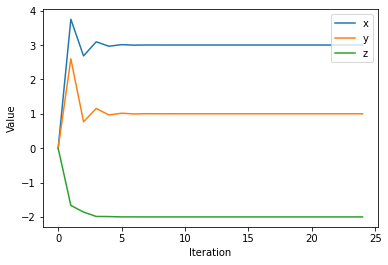

In [13]:
#Put your code to the above question here
x = []
y = []
z = []
x.append(0)
y.append(0)
z.append(0)


for i in range(1,25):
    xi = (15 - y[i-1]+ z[i-1])/4
    yi = (2*x[i-1]- 13 - z[i-1])/(-5) 
    zi = (y[i-1] - x[i-1] - 10)/6 
    x.append(xi)
    y.append(yi)
    z.append(zi)

plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);


&#9989; **<font color=red>Question 5b(iv) </font>** (2 points) Did the Jacobi method converge when using it to solve $\text{(I)}$? Is this consistent with the [condition we learned in class](#DD) for the Jacobi method to converge?

Yes it did. It is consistent. 

&#9989; **<font color=red>Question 5c</font>** (7 points total) Consider the following system of equations, denoted by $\text{(II)}$. $$\begin{align}7x + 4y - 4z &= 33 \\ -4x - 7y + 4z &= -27 \\ 4x - 4y + 7z &= -6\end{align} \tag{II}$$

&#9989; **<font color=red>Question 5c(i) </font>** (1 point) Use numpy to solve $\text{(II)}$ and display the solution. 

In [22]:
#Put your code to the above question here
A_5c = np.matrix([[7,4,-4], [-4,-7,4],[4,-4,7]])
b_5c = np.matrix([[33],[-27],[-6]])
x_c = np.linalg.solve(A_5c,b_5c)
print(x_c)

[[ 3.]
 [ 1.]
 [-2.]]


&#9989; **<font color=red>Question 5c(ii) </font>** (1 point) Based on the [condition we learned in class](#DD), is the Jacobi method guaranteed to converge if we use it to solve $\text{(II)}$?

Here the system of equations is not diagonally dominant because 8>7 for each row therefore the diagonal variable is less than the sum of the other row variables; therefore the conditions are not met for this to converge when using the Jacobi method to solve. 

&#9989; **<font color=red>Question 5c(iii) </font>** (3 points) Regardless of your answer to Question 5c(ii), use $25$ iterations of the Jacobi method to solve $\text{(II)}$. Make a plot showing the iteration number on the horizontal axis and the values of $x$, $y$, and $z$ on each iteration on the vertical axis.

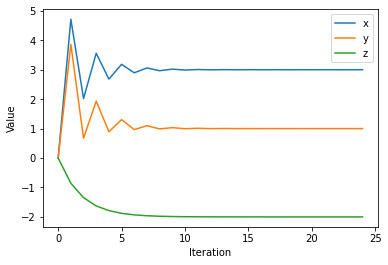

In [23]:
#Put your code to the above question here
x_c = []
y_c = []
z_c = []
x_c.append(0)
y_c.append(0)
z_c.append(0)



for i in range(1,25):
    xi = (33 - 4*y_c[i-1]+ 4*z_c[i-1])/7
    yi = (4*z_c[i-1] + 27 - 4*x_c[i-1])/7 
    zi = (4*y_c[i-1] - 4*x_c[i-1] - 6)/7 
    x_c.append(xi)
    y_c.append(yi)
    z_c.append(zi)

plt.plot(x_c, label='x')
plt.plot(y_c, label='y')
plt.plot(z_c, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);


&#9989; **<font color=red>Question 5c(iv) </font>** (2 points) Did the Jacobi method converge when using it to solve $\text{(II)}$? Is this consistent with the [condition we learned in class](#DD) for the Jacobi method to converge?

It did converge which is not consistent with the conditions we learned in class. 

&#9989; **<font color=red>Question 5d</font>** (7 points total) Consider the following system of equations, denoted by $\text{(III)}$. $$\begin{align}7x + 4y + 4z &= 17 \\ 4x + 7y + 4z &= 11 \\ 4x + 4y + 7z &= 2\end{align} \tag{III}$$

&#9989; **<font color=red>Question 5d(i) </font>** (1 point) Use numpy to solve $\text{(III)}$ and display the solution. 

In [14]:
#Put your code to the above question here
A_5d = np.matrix([[7,4,4], [4,7,4],[4,4,7]])
b_5d = np.matrix([[17],[11],[2]])
x_d = np.linalg.solve(A_5d,b_5d)
print(x_d)

[[ 3.]
 [ 1.]
 [-2.]]


&#9989; **<font color=red>Question 5d(ii) </font>** (1 point) Based on the [condition we learned in class](#DD), is the Jacobi method guaranteed to converge if we use it to solve $\text{(III)}$?

Here the system of equations is not diagonally dominant because 8>7 for each row therefore the diagonal variable is less than the sum of the other row variables; therefore the conditions are not met for this to converge when using the Jacobi method to solve.

&#9989; **<font color=red>Question 5d(iii) </font>** (3 points) Regardless of your answer to Question 5.3.2, use the Jacobi method to solve $\text{(III)}$. Make a plot showing the iteration number on the horizontal axis and the values of $x$, $y$, and $z$ on each iteration on the vertical axis.

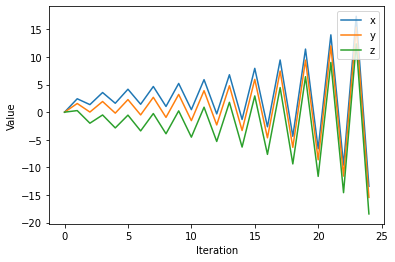

In [20]:
#Put your code to the above question here
x_d = []
y_d = []
z_d = []
x_d.append(0)
y_d.append(0)
z_d.append(0)



for i in range(1,25):
    xi = (17 - 4*y_d[i-1] - 4*z_d[i-1])/7
    yi = (11 - 4*z_d[i-1] - 4*x_d[i-1])/7 
    zi = (2 - 4*y_d[i-1] - 4*x_d[i-1])/7 
    x_d.append(xi)
    y_d.append(yi)
    z_d.append(zi)

plt.plot(x_d, label='x')
plt.plot(y_d, label='y')
plt.plot(z_d, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);

&#9989; **<font color=red>Question 5d(iv) </font>** (2 points) Did the Jacobi method converge when using it to solve $\text{(III)}$? Is this consistent with the [condition we learned in class](#DD) for the Jacobi method to converge?

Here based off of our graph the jacobi method did not converge when using it to solve our system of equations which is consistent with the conditions that we learned since it is not diagonally dominant. 

---------
### Congratulations, we're done!
